In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/train (2).csv")
df_test=pd.read_csv("/content/test (1).csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_selected=df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]

In [9]:
df_selected

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


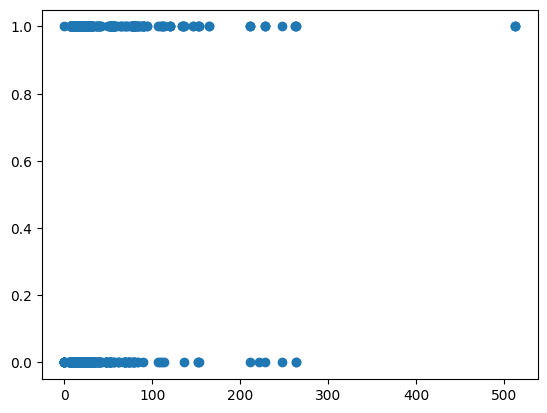

In [10]:
plt.scatter(x=df["Fare"],y=df["Survived"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c1872269a80>,
 'caps': [<matplotlib.lines.Line2D at 0x7c1874361d80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c18722697e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7c187226a350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c187226a5f0>,
 'means': []}

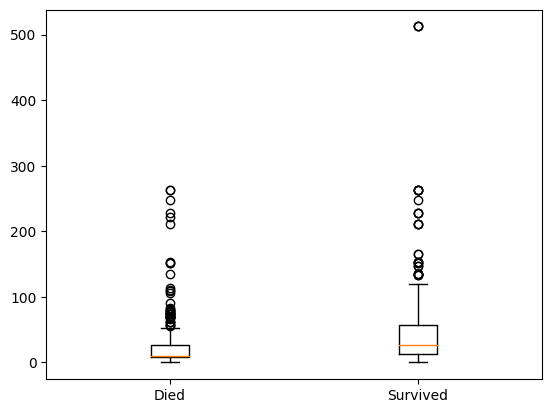

In [11]:
plt.boxplot([df[df['Survived'] == 0]['Fare'], df[df['Survived'] == 1]['Fare']], labels=['Died', 'Survived'])

In [12]:
import seaborn as sns

<Axes: xlabel='Fare', ylabel='Survived'>

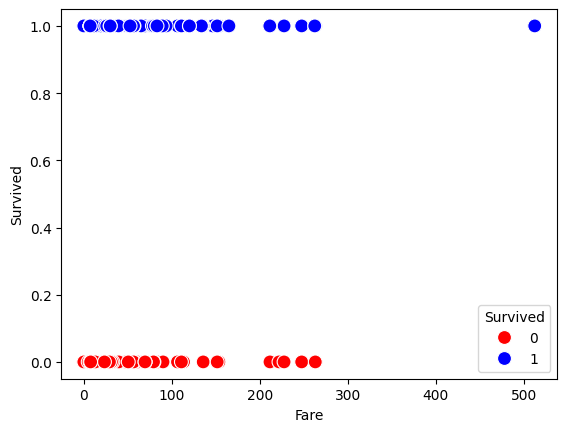

In [13]:
sns.scatterplot(x='Fare', y='Survived', hue='Survived', data=df, palette=['red', 'blue'], marker='o', s=100)

<Axes: xlabel='Fare', ylabel='Count'>

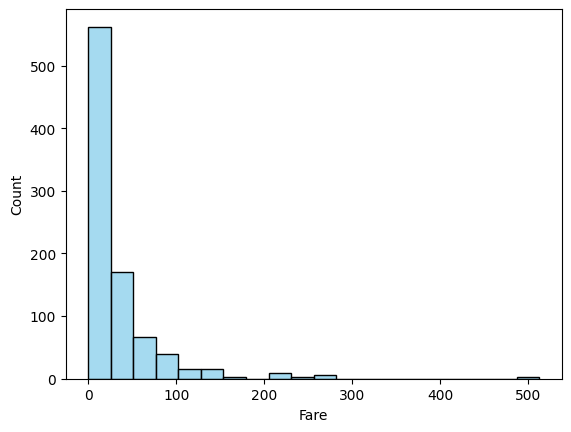

In [14]:
sns.histplot(data=df, x='Fare', bins=20, color='skyblue', edgecolor='black', kde=False)

In [15]:
log_transformed_fare = np.log(df["Fare"]+1)

<Axes: xlabel='Fare', ylabel='Count'>

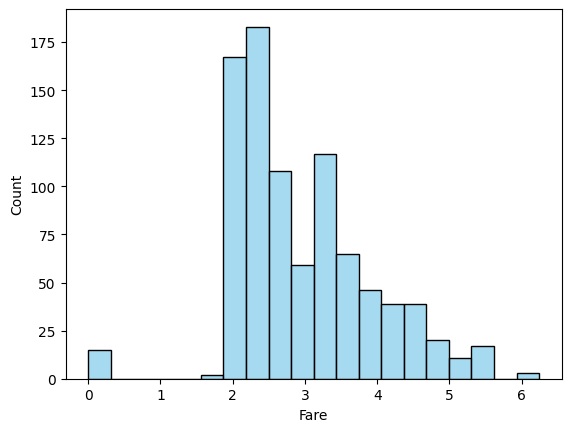

In [16]:
sns.histplot(x=log_transformed_fare, bins=20, color='skyblue', edgecolor='black', kde=False)

<ipython-input-17-9daf4ff69a8d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Fare', data=df, palette='muted', split=True)


<Axes: xlabel='Survived', ylabel='Fare'>

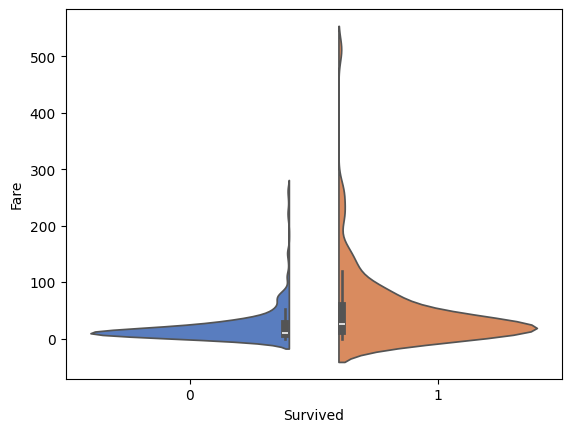

In [17]:
sns.violinplot(x='Survived', y='Fare', data=df, palette='muted', split=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Age', ylabel='Count'>

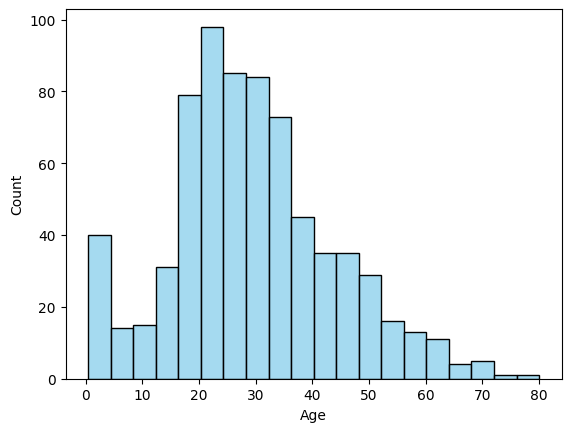

In [19]:
sns.histplot(data=df, x='Age', bins=20, color='skyblue', edgecolor='black', kde=False)

In [20]:
df_selected[df_selected["Age"].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,3,male,NaN,0,0,8.4583,Q
17,2,male,NaN,0,0,13.0000,S
19,3,female,NaN,0,0,7.2250,C
26,3,male,NaN,0,0,7.2250,C
28,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...
859,3,male,NaN,0,0,7.2292,C
863,3,female,NaN,8,2,69.5500,S
868,3,male,NaN,0,0,9.5000,S
878,3,male,NaN,0,0,7.8958,S


In [21]:
median_age = df_selected['Age'].median()
df_selected['Age'] = df_selected['Age'].fillna(median_age)

<ipython-input-21-ac24a1b5542c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Age'] = df_selected['Age'].fillna(median_age)


In [22]:
df_selected[df_selected['Age'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


{'whiskers': [<matplotlib.lines.Line2D at 0x7c18678094b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c18678099f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c1867809210>,
 'medians': [<matplotlib.lines.Line2D at 0x7c1867809f30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c186780a1d0>,
 'means': []}

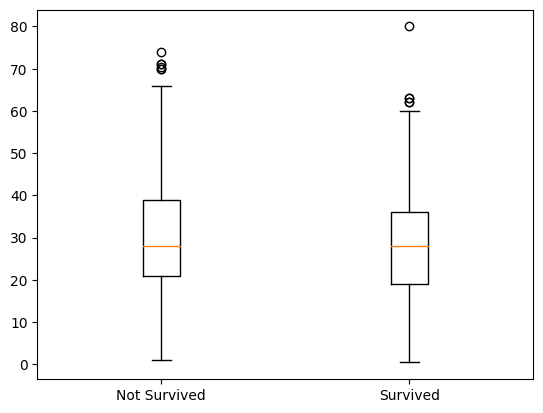

In [25]:
plt.boxplot([df[df['Survived'] == 0]['Age'].dropna(), df[df['Survived'] == 1]['Age'].dropna()], labels=['Not Survived', 'Survived'])

In [26]:
df_selected

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [27]:
df_selected.loc[:, "log_fare"] = log_transformed_fare

<ipython-input-27-537aa50d6ff0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, "log_fare"] = log_transformed_fare


In [28]:
df_selected=df_selected.drop("Fare",axis=1)

In [29]:
df_selected

,Pclass,Sex,Age,SibSp,Parch,Embarked,log_fare
0,3,male,22.0,1,0,S,2.110213
1,1,female,38.0,1,0,C,4.280593
2,3,female,26.0,0,0,S,2.188856
3,1,female,35.0,1,0,S,3.990834
4,3,male,35.0,0,0,S,2.202765
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,S,2.639057
887,1,female,19.0,0,0,S,3.433987
888,3,female,28.0,1,2,S,3.196630
889,1,male,26.0,0,0,C,3.433987


In [30]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df_selected["encoded_gender"] = le.fit_transform(df_selected["Sex"])
df_selected

,Pclass,Sex,Age,SibSp,Parch,Embarked,log_fare,encoded_gender
0,3,male,22.0,1,0,S,2.110213,1
1,1,female,38.0,1,0,C,4.280593,0
2,3,female,26.0,0,0,S,2.188856,0
3,1,female,35.0,1,0,S,3.990834,0
4,3,male,35.0,0,0,S,2.202765,1
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,S,2.639057,1
887,1,female,19.0,0,0,S,3.433987,0
888,3,female,28.0,1,2,S,3.196630,0
889,1,male,26.0,0,0,C,3.433987,1


In [31]:
df_selected=df_selected.drop("Sex",axis=1)

In [32]:
df_selected[["Embarked"]].shape

(891, 1)

In [33]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
encoded_data = onehot_encoder.fit_transform(df_selected[["Embarked"]])
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(['Embarked']))

# Concatenate the encoded dataframe with df_selected
df_selected = pd.concat([df_selected, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
df_selected=df_selected.drop("Embarked",axis=1)

In [35]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          891 non-null    int64  
 1   Age             891 non-null    float64
 2   SibSp           891 non-null    int64  
 3   Parch           891 non-null    int64  
 4   log_fare        891 non-null    float64
 5   encoded_gender  891 non-null    int64  
 6   Embarked_C      891 non-null    float64
 7   Embarked_Q      891 non-null    float64
 8   Embarked_S      891 non-null    float64
 9   Embarked_nan    891 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 69.7 KB


In [36]:
from sklearn.model_selection import train_test_split
#X = df.drop('target_variable', axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(df_selected, y, test_size=0.2, random_state=42)

In [37]:
df_selected.isnull().sum()

Pclass            0
Age               0
SibSp             0
Parch             0
log_fare          0
encoded_gender    0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Embarked_nan      0
dtype: int64

In [38]:
df_selected.describe()

,Pclass,Age,SibSp,Parch,log_fare,encoded_gender,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,2.962246,0.647587,0.188552,0.086420,0.722783,0.002245
std,0.836071,13.019697,1.102743,0.806057,0.969048,0.477990,0.391372,0.281141,0.447876,0.047351
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,2.187218,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,2.737881,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,3.465736,1.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000,6.240917,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
for col in x_train.columns:
    print(x_train[col].dtype)

int64
float64
int64
int64
float64
int64
float64
float64
float64
float64


In [40]:
y_train.isnull().sum()

0

In [41]:
x_train.describe()

,Pclass,Age,SibSp,Parch,log_fare,encoded_gender,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.330056,29.204129,0.553371,0.379213,2.955619,0.655899,0.175562,0.084270,0.737360,0.002809
std,0.824584,13.007971,1.176404,0.791669,0.980953,0.475408,0.380714,0.277987,0.440378,0.052963
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,2.188856,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,2.737881,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,3.449988,1.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,80.000000,8.000000,6.000000,6.240917,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [43]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
fin_sel=df_test[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]

In [46]:
fin_sel.loc[:,"encoded_gender"] = le.transform(fin_sel.loc[:,"Sex"])

<ipython-input-46-63c4bcc98c68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_sel.loc[:,"encoded_gender"] = le.transform(fin_sel.loc[:,"Sex"])


In [47]:
fin_sel=fin_sel.drop("Sex",axis=1)

In [48]:
encoded_data1 = onehot_encoder.transform(fin_sel[["Embarked"]])
encoded_df1 = pd.DataFrame(encoded_data1, columns=onehot_encoder.get_feature_names_out(['Embarked']))

# Concatenate the encoded dataframe with df_selected
fin_sel = pd.concat([fin_sel, encoded_df1], axis=1)

In [49]:
fin_sel=fin_sel.drop("Embarked",axis=1)

In [50]:
log_transformed_fare1 = np.log(fin_sel["Fare"]+1)

In [51]:
fin_sel.loc[:,"fare1"]=log_transformed_fare1

In [52]:
fin_sel=fin_sel.drop("Fare",axis=1)

In [53]:
fin_sel = fin_sel.rename(columns={'fare1': 'log_fare'})

In [55]:
fin_sel

,Pclass,Age,SibSp,Parch,encoded_gender,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,log_fare
0,3,34.5,0,0,1,0.0,1.0,0.0,0.0,2.178064
1,3,47.0,1,0,0,0.0,0.0,1.0,0.0,2.079442
2,2,62.0,0,0,1,0.0,1.0,0.0,0.0,2.369075
3,3,27.0,0,0,1,0.0,0.0,1.0,0.0,2.268252
4,3,22.0,1,1,0,0.0,0.0,1.0,0.0,2.586824
...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,1,0.0,0.0,1.0,0.0,2.202765
414,1,39.0,0,0,0,1.0,0.0,0.0,0.0,4.699571
415,3,38.5,0,0,1,0.0,0.0,1.0,0.0,2.110213
416,3,NaN,0,0,1,0.0,0.0,1.0,0.0,2.202765


In [56]:
last_column_index = fin_sel.columns.get_loc('log_fare')

# Reorder columns by creating a new DataFrame with the desired order
new_order = list(fin_sel.columns[:-1])  # Exclude the last column
new_order.insert(4, 'log_fare')  # Insert 'log_fare' at the 4th position
fin_sel = fin_sel[new_order]

# Check the updated DataFrame
print(fin_sel)

     Pclass   Age  SibSp  Parch  log_fare  encoded_gender  Embarked_C  \
0         3  34.5      0      0  2.178064               1         0.0   
1         3  47.0      1      0  2.079442               0         0.0   
2         2  62.0      0      0  2.369075               1         0.0   
3         3  27.0      0      0  2.268252               1         0.0   
4         3  22.0      1      1  2.586824               0         0.0   
..      ...   ...    ...    ...       ...             ...         ...   
413       3   NaN      0      0  2.202765               1         0.0   
414       1  39.0      0      0  4.699571               0         1.0   
415       3  38.5      0      0  2.110213               1         0.0   
416       3   NaN      0      0  2.202765               1         0.0   
417       3   NaN      1      1  3.150952               1         1.0   

     Embarked_Q  Embarked_S  Embarked_nan  
0           1.0         0.0           0.0  
1           0.0         1.0        

In [62]:
fin_pred = rf_classifier.predict(fin_sel)

In [58]:
fin_sel['Age'] = fin_sel['Age'].fillna(median_age)

In [59]:
fin_sel.isnull().sum()

Pclass            0
Age               0
SibSp             0
Parch             0
log_fare          1
encoded_gender    0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Embarked_nan      0
dtype: int64

In [60]:
median_fare = fin_sel['log_fare'].median()
fin_sel['log_fare'] = fin_sel['log_fare'].fillna(median_fare)

In [ ]:
fin_pred = rf_classifier.predict(fin_sel)

In [63]:
# Assuming you have the test set IDs and your predictions in the variable 'predictions'
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],  # Replace with your test set IDs
    "Survived": fin_pred     # Replace with your predictions
})

submission.to_csv('submission.csv', index=False)  # Save the submission as a CSV file

# After saving the file, you can use the Kaggle API or manually upload the submission file to the competition page on Kaggle.


In [64]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
